## Check Installations

In [11]:
import sys, platform
import numpy as np, pandas as pd, matplotlib.pyplot as plt

print("Python:", sys.version)
print("Platform:", platform.platform())
print("pandas:", pd.__version__)
print("numpy:", np.__version__)

Python: 3.9.6 (default, Oct 18 2022, 12:41:40) 
[Clang 14.0.0 (clang-1400.0.29.202)]
Platform: macOS-12.7.6-x86_64-i386-64bit
pandas: 2.3.2
numpy: 2.0.2


## Import data from Kagglehub

In [5]:
from pathlib import Path
import pandas as pd

# choose a stable local filename
LOCAL_CSV = Path("data/raw/pump_sensor_v1.csv")
LOCAL_PARQUET = Path("data/raw/pump_sensor_v1.parquet")

def load_pump_data_cached():
    # 1) Prefer local Parquet (fast), then CSV
    if LOCAL_PARQUET.exists():
        print(f"Loading local Parquet: {LOCAL_PARQUET}")
        return pd.read_parquet(LOCAL_PARQUET)
    if LOCAL_CSV.exists():
        print(f"Loading local CSV: {LOCAL_CSV}")
        return pd.read_csv(LOCAL_CSV)
    
    # 2) If not found locally, fetch once from Kaggle, then save
    print("Local copy not found. Fetching from KaggleHub…")
    import kagglehub
    from kagglehub import KaggleDatasetAdapter

    # Optionally list files to confirm the name
    # files = kagglehub.list_dataset_files("nphantawee/pump-sensor-data")
    # print(files)

    file_path = "sensor.csv"  # change if your dataset uses a different file
    df = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        "nphantawee/pump-sensor-data",
        file_path,
    )

    # Save locally (both formats are handy)
    LOCAL_CSV.parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(LOCAL_CSV, index=False)
    try:
        df.to_parquet(LOCAL_PARQUET, index=False)  # needs pyarrow
    except Exception as e:
        print(f"(Parquet save skipped: {e})")

    print(f"Saved local copies: {LOCAL_CSV} {LOCAL_PARQUET if LOCAL_PARQUET.exists() else ''}")
    return df

df = load_pump_data_cached()
df.head()


Loading local Parquet: data/raw/pump_sensor_v1.parquet


,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


## Check sample data for shape, columns and missing values

In [6]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.sample(5)



Shape: (220320, 55)
Columns: ['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status']


,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
69380,69380,2018-05-19 04:20:00,0.110185,47.26563,52.25694,43.185760,201.756348,0.00000,3.052662,13.83102,...,35.677082,126.446800,33.564820,37.32639,34.722220,104.16670,94.328700,224.2477,179.6875,RECOVERING
43998,43998,2018-05-01 13:18:00,2.451620,48.39410,52.51736,45.963539,635.879600,71.59959,13.122110,16.39178,...,46.875000,43.402780,73.495370,51.79398,46.585650,65.39352,50.636574,180.8449,185.7639,NORMAL
138434,138434,2018-07-06 03:14:00,2.402431,51.95312,49.73958,43.012150,638.773200,91.02605,14.084200,16.16030,...,48.697910,38.773150,42.245369,40.79861,40.798611,140.33560,50.636574,223.0903,182.0023,NORMAL
9830,9830,2018-04-07 19:50:00,2.369965,45.39930,49.13194,41.623260,628.561900,84.99611,13.172740,16.12413,...,37.760410,36.458330,39.062500,41.08796,40.798611,94.03935,42.534721,156.8287,168.9815,NORMAL
42717,42717,2018-04-30 15:57:00,2.471296,46.83160,51.21527,44.878471,627.199100,74.54282,13.614000,16.21094,...,46.093750,39.351852,40.219906,49.76852,43.692131,85.64815,49.768520,205.7292,183.7384,NORMAL


### check missing value and get the sum of from each sensor and so 10 records out of it

In [9]:
df.isna().sum().head(10)

Unnamed: 0        0
timestamp         0
sensor_00     10208
sensor_01       369
sensor_02        19
sensor_03        19
sensor_04        19
sensor_05        19
sensor_06      4798
sensor_07      5451
dtype: int64

## Visualization for checking sesnsor behaviour on df

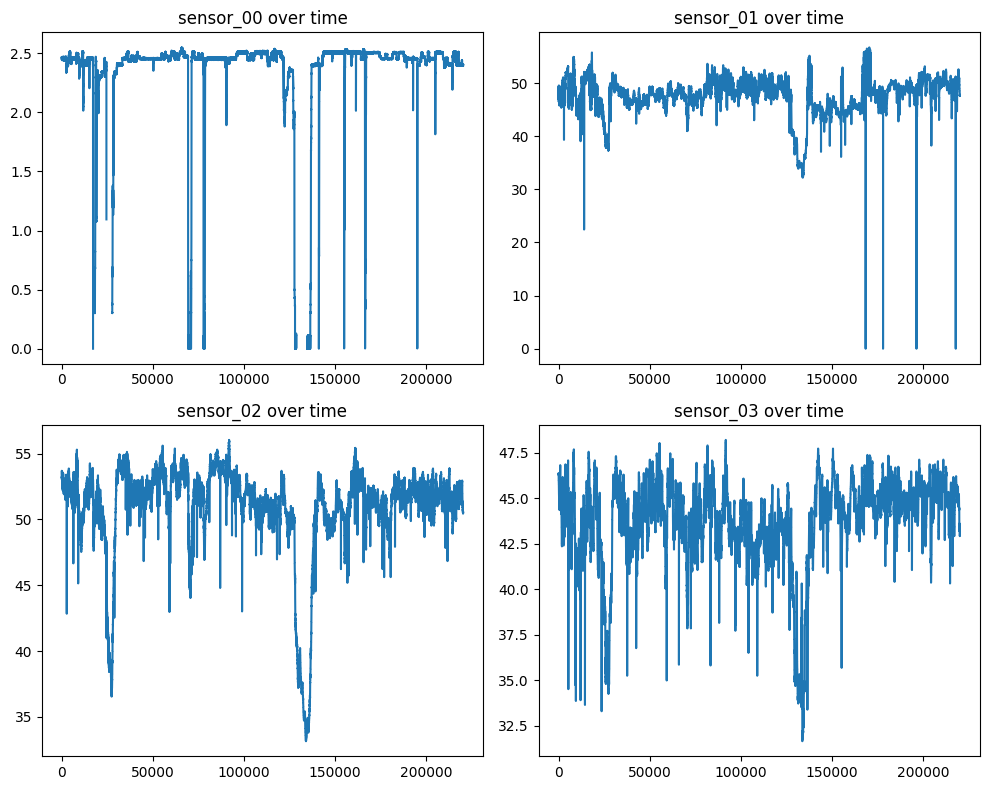

In [12]:
num_cols = df.select_dtypes(include="number").columns
x = np.arange(len(df))

fig, axes = plt.subplots(2, 2, figsize=(10, 8))


axes[0, 0].plot(x, df[num_cols[1]].values)
axes[0, 0].set_title(f"{num_cols[1]} over time")


axes[0, 1].plot(x, df[num_cols[2]].values)
axes[0, 1].set_title(f"{num_cols[2]} over time")


axes[1, 0].plot(x, df[num_cols[3]].values)
axes[1, 0].set_title(f"{num_cols[3]} over time")


axes[1, 1].plot(x, df[num_cols[4]].values)
axes[1, 1].set_title(f"{num_cols[4]} over time")

plt.tight_layout()
plt.show()




## Check machine status/failure column:  Identify the number of broken, Recovering and Normal rows

In [13]:
status_cols = [c for c in df.columns if "status" in c.lower()]
if status_cols:
    print("Status column found:", status_cols[0])
    print(df[status_cols[0]].value_counts())
else:
    print("No explicit status column found.")


Status column found: machine_status
machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, dtype: int64


In [14]:
print(df.nunique())

Unnamed: 0        220320
timestamp         220320
sensor_00           1253
sensor_01            831
sensor_02            831
sensor_03            588
sensor_04           7844
sensor_05         190751
sensor_06            812
sensor_07            531
sensor_08            626
sensor_09            565
sensor_10         198804
sensor_11         196368
sensor_12         187145
sensor_13         191983
sensor_14          94564
sensor_15              0
sensor_16         110522
sensor_17         148000
sensor_18         152603
sensor_19         100422
sensor_20          92129
sensor_21         131083
sensor_22         126401
sensor_23         119286
sensor_24         133778
sensor_25         165999
sensor_26         179718
sensor_27         203198
sensor_28         189278
sensor_29         201908
sensor_30           2070
sensor_31           2685
sensor_32         205414
sensor_33         200855
sensor_34         203895
sensor_35         201781
sensor_36         201437
sensor_37         188898


## Clening Dataset

### Dropping column 0 and sensor_15 data as column 0 is serial numbers and sensor_15 is all null value

In [15]:
df = df.drop(columns=["Unnamed: 0", "sensor_15"], errors="ignore")

## Handling Missing value using forward fill and using median full for leftover gaps.

In [21]:
df = df.fillna(method="ffill")  
df = df.fillna(df.median(numeric_only=True))  
print(df.isna().sum().sum())

/var/folders/k1/1h7ndcbd6_bgc2gbsr0msz1c0000gn/T/ipykernel_1163/1300871130.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


0


## Generating Remaining Useful Life.(RUL)

### creating new column RUL which counts down from the lastworking cycle -> 0 at failure
#### Example: If a pump breaks at 1000th cycle, then at cycle 950 → RUL=50, at cycle 999 → RUL=1, at 1000 → RUL=0.
#### counting backward to indentify the failure

In [22]:
df["RUL"] = np.nan
failure_indices = df.index[df["machine_status"] == "BROKEN"]

for fail_idx in failure_indices:
    counter = 0
    i = fail_idx
    while i >= 0 and df.loc[i, "machine_status"] != "BROKEN":
        df.loc[i, "RUL"] = counter
        counter += 1
        i -= 1
    df.loc[fail_idx, "RUL"] = 0


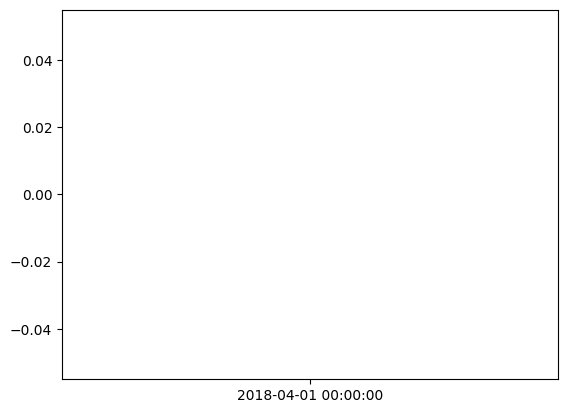

In [23]:
plt.plot(df["timestamp"][:2000], df["RUL"][:2000])

In [24]:
print(df["machine_status"].unique())
print(df["machine_status"].value_counts())


['NORMAL' 'BROKEN' 'RECOVERING']
machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, dtype: int64


In [25]:
import numpy as np

# Initialize RUL with big number
df["RUL"] = np.inf

# Get all failure points
failures = df.index[df["machine_status"] == "BROKEN"]

# For each row, find how far until next BROKEN
for i in range(len(df)):
    next_failures = failures[failures > i]
    if len(next_failures) > 0:
        df.loc[i, "RUL"] = next_failures[0] - i
    else:
        df.loc[i, "RUL"] = np.nan  # no more failures after this point


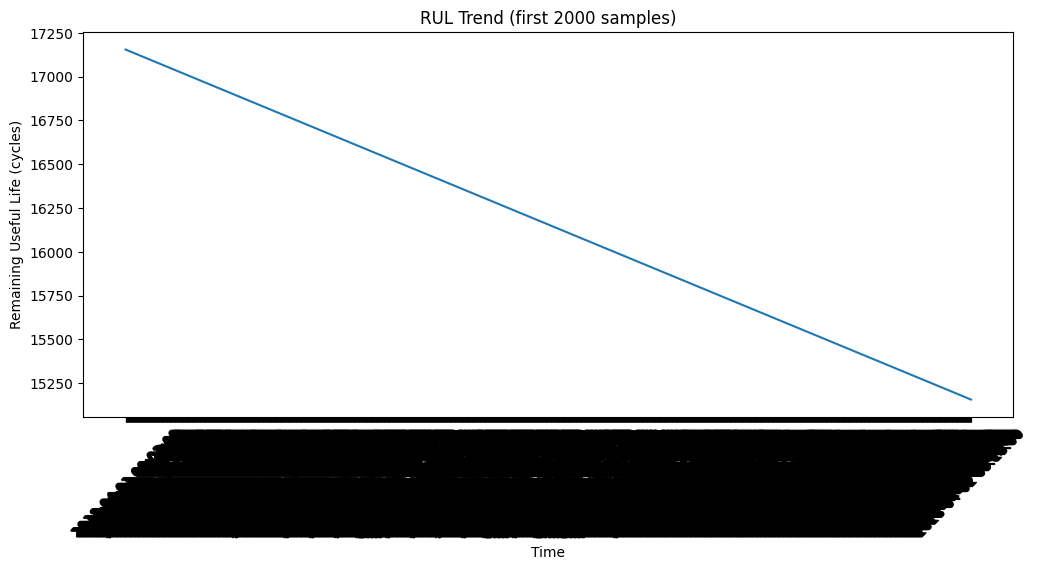

In [26]:
plt.figure(figsize=(12,5))
plt.plot(df["timestamp"][:2000], df["RUL"][:2000])
plt.xticks(rotation=45)
plt.title("RUL Trend (first 2000 samples)")
plt.ylabel("Remaining Useful Life (cycles)")
plt.xlabel("Time")
plt.show()


#### In first 2K sample did not find failure it may be far so printitng failure occurance

In [27]:
failure_indices = df.index[df["machine_status"] == "BROKEN"]
print("First 10 failure rows:", failure_indices[:10])


First 10 failure rows: Index([17155, 24510, 69318, 77790, 128040, 141131, 166440], dtype='int64')


##### Zooming neaar a failure event

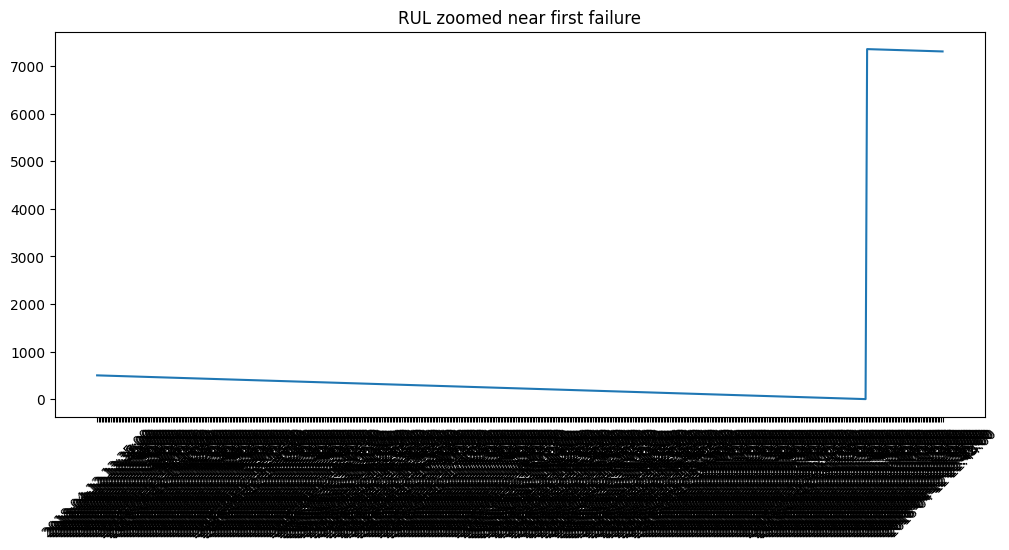

In [28]:
idx = failure_indices[0]  # first failure
window = 500  # look 500 steps before failure
subset = df.iloc[idx-window:idx+50]

plt.figure(figsize=(12,5))
plt.plot(subset["timestamp"], subset["RUL"])
plt.xticks(rotation=45)
plt.title("RUL zoomed near first failure")
plt.show()



In [29]:
df.loc[idx, ["timestamp","machine_status","RUL"]]


timestamp         2018-04-12 21:55:00
machine_status                 BROKEN
RUL                            7355.0
Name: 17155, dtype: object

Convert this time-series into training samples (sliding windows),

Train a first baseline ML model (Random Forest),

Evaluate how well it predicts RUL.

### keep raw/processed data, models, and notebooks

In [30]:
import os, pathlib

# change this if your paths are different
BASE = pathlib.Path(".")
DATA_RAW = BASE / "data" / "raw"
DATA_PROCESSED = BASE / "data" / "processed"
MODELS = BASE / "models"

for p in [DATA_RAW, DATA_PROCESSED, MODELS]:
    p.mkdir(parents=True, exist_ok=True)

print("Folders ready:", DATA_RAW, DATA_PROCESSED, MODELS)


Folders ready: data/raw data/processed models


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

### Read the data and parse timestamps for plotting/splitting.

In [33]:
csv_path = "data/raw/pump_sensor_v1.csv"

df = pd.read_csv(csv_path)
if "timestamp" in df.columns:
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

print("Data loaded:", df.shape)
df.head()    

Data loaded: (220320, 55)


,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


### Data cleaning

In [35]:
# drop index-like column created by CSV export (if present)
for index_column in ["Unnamed: 0", "index"]:
    if index_column in df.columns:
        df = df.drop(columns=[index_column])

# drop fully-empty sensor if present (we saw sensor_15 was all-NaN)
if "sensor_15" in df.columns and df["sensor_15"].isna().all():
    df = df.drop(columns=["sensor_15"])

# normalize machine_status text (NORMAL/BROKEN/RECOVERING etc.)
df["machine_status"] = (
    df["machine_status"].astype(str).str.strip().str.upper()
)

print("Columns:", len(df.columns))
print(df["machine_status"].value_counts())


Columns: 53
machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, dtype: int64


### Forward fill mimics “hold last sensor value”, median fill is a robust fallback.

In [36]:
num_cols = df.select_dtypes(include=["number"]).columns.tolist()

# forward-fill numeric gaps
df[num_cols] = df[num_cols].fillna(method="ffill")
# fill any leftovers with medians
df[num_cols] = df[num_cols].fillna(df[num_cols].median(numeric_only=True))

print("Total remaining NaNs:", df.isna().sum().sum())



/var/folders/k1/1h7ndcbd6_bgc2gbsr0msz1c0000gn/T/ipykernel_1163/2923745267.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[num_cols] = df[num_cols].fillna(method="ffill")


Total remaining NaNs: 0


## Compute RUL = steps until the next failure
### we want “how many steps remain before the next BROKEN”. We do this in a vectorized way which is fast.

In [ ]:
N = len(df)
print ("Total rows:", N)
idx = np.arange(N)

# Identify the failures
failure_idx = np.where(df["machine_status"].values == "BROKEN")[0]
if failure_idx.size == 0:
    raise ValueError("No BROKEN rows found; cannot compute RUL.")

# for each row i, find the first failure index >= i
pos = np.searchsorted(failure_idx, idx, side="left")

# next failure index for each row (NaN if none after)
next_fail = np.full(N, np.nan, dtype="float64")
valid = pos < failure_idx.size
next_fail[valid] = failure_idx[pos[valid]]

# RUL = distance to next failure; 0 exactly at failures
df["RUL"] = next_fail - idx
df.loc[df["machine_status"] == "BROKEN", "RUL"] = 0.0

# clip very large RUL (stabilizes training)
MAX_RUL = 2000
df["RUL_clipped"] = df["RUL"].clip(upper=MAX_RUL)

# sanity peek near the first failure
first_fail = int(failure_idx[0])
df.loc[first_fail-5:first_fail+2, ["timestamp","machine_status","RUL","RUL_clipped"]]


Total rows: 220320


,timestamp,machine_status,RUL,RUL_clipped
17150,2018-04-12 21:50:00,NORMAL,5.0,5.0
17151,2018-04-12 21:51:00,NORMAL,4.0,4.0
17152,2018-04-12 21:52:00,NORMAL,3.0,3.0
17153,2018-04-12 21:53:00,NORMAL,2.0,2.0
17154,2018-04-12 21:54:00,NORMAL,1.0,1.0
17155,2018-04-12 21:55:00,BROKEN,0.0,0.0
17156,2018-04-12 21:56:00,RECOVERING,7354.0,2000.0
17157,2018-04-12 21:57:00,RECOVERING,7353.0,2000.0


### Plot to see first failure to check it is hitting zero

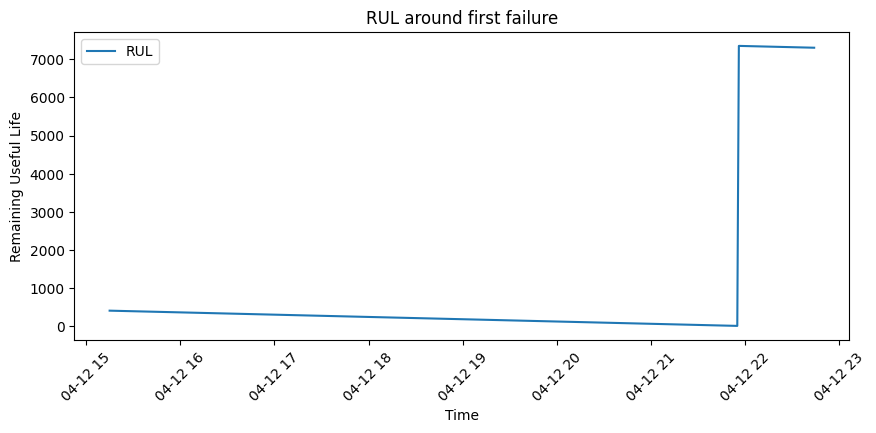

In [41]:
window = 400  # look 400 rows before the first failure
start = max(0, first_fail - window)
subset = df.iloc[start:first_fail+50]

plt.figure(figsize=(10,4))
plt.plot(subset["timestamp"], subset["RUL"], label="RUL")
plt.xticks(rotation=45)
plt.title("RUL around first failure")
plt.ylabel("Remaining Useful Life")
plt.xlabel("Time")
plt.legend()
plt.show()


## sensor columns & define window features
### We turn the last WINDOW rows into summary features per sensor (mean/std/min/max/last/slope)


In [42]:
sensor_cols = [c for c in df.columns if c.startswith("sensor_") and c in df.columns and c in num_cols]
len(sensor_cols), sensor_cols[:8]

(51,
 ['sensor_00',
  'sensor_01',
  'sensor_02',
  'sensor_03',
  'sensor_04',
  'sensor_05',
  'sensor_06',
  'sensor_07'])

In [43]:
def window_features(arr: np.ndarray) -> np.ndarray:
    """
    arr: shape (W, S) where W=window length, S=#sensors
    returns: 1D feature vector concatenating per-sensor stats:
             mean, std, min, max, last, slope
    """
    # basic stats along time axis
    mean_ = np.mean(arr, axis=0)
    std_  = np.std(arr, axis=0, ddof=0)
    min_  = np.min(arr, axis=0)
    max_  = np.max(arr, axis=0)
    last_ = arr[-1, :]

    # slope per sensor via simple least-squares
    W = arr.shape[0]
    x = np.arange(W)
    x_mean = x.mean()
    denom = np.sum((x - x_mean) ** 2) if W > 1 else 1.0
    y_centered = arr - arr.mean(axis=0, keepdims=True)
    slope_ = (y_centered * (x - x_mean)[:, None]).sum(axis=0) / denom

    return np.concatenate([mean_, std_, min_, max_, last_, slope_], axis=0)


## Build windowed dataset (X, y)
- **WINDOW** → How many past rows per sample  
- **STEP** → Hop size; overlap is OK (helps the model see more situations)  
- We drop samples whose label would be **NaN** (after the last failure there’s no “next failure”).  


In [44]:
WINDOW = 60      # ~last 60 minutes if data is minutely
STEP   = 30      # 50% overlap
MAX_RUL = 2000   # already used above

X_list, y_list, end_idx = [], [], []

# only build windows where the label exists (before the last failure)
last_labelable = np.where(~np.isnan(df["RUL"].values))[0][-1]

for start in range(0, last_labelable - WINDOW + 1, STEP):
    end = start + WINDOW
    arr = df.loc[start:end-1, sensor_cols].values.astype("float32", copy=False)
    feats = window_features(arr)
    label = float(min(df.loc[end-1, "RUL"], MAX_RUL))
    X_list.append(feats)
    y_list.append(label)
    end_idx.append(end-1)

X = np.vstack(X_list).astype("float32")
y = np.asarray(y_list, dtype="float32")
end_idx = np.asarray(end_idx, dtype="int32")

print("X shape:", X.shape)  # (samples, features)
print("y shape:", y.shape)  # (samples,)


X shape: (5547, 306)
y shape: (5547,)


## Time-based train/test split
### predictive models must be tested on future data, not randomly shuffled past+future.

In [50]:
split_point = int(np.quantile(end_idx, 0.8))  # 80th percentile of window end rows
train_mask = end_idx < split_point
test_mask  = ~train_mask

X_train, y_train = X[train_mask], y[train_mask]
X_test,  y_test  = X[test_mask],  y[test_mask]

print("Train windows:", X_train.shape[0])
print("Test windows:",  X_test.shape[0])



Train windows: 4437
Test windows: 1110


## Train a Random Forest baseline
### good first model for tabular features; handles non-linearities; minimal tuning.

In [51]:
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE:  230.11
RMSE: 427.86


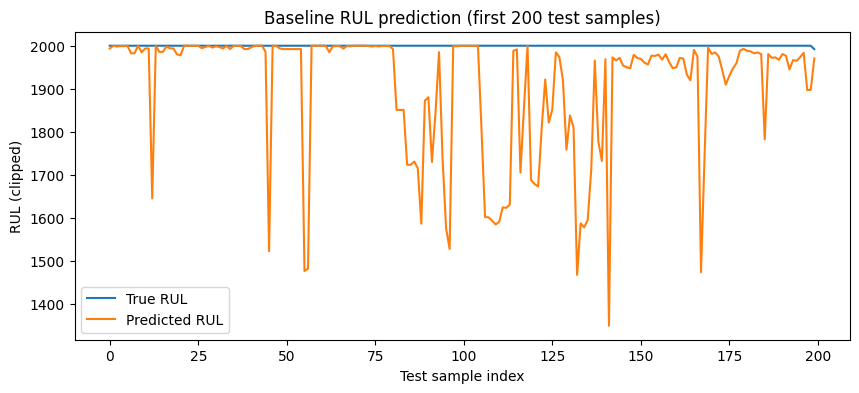

In [52]:
plt.figure(figsize=(10,4))
n = min(200, len(y_test))
plt.plot(y_test[:n], label="True RUL")
plt.plot(y_pred[:n], label="Predicted RUL")
plt.title("Baseline RUL prediction (first 200 test samples)")
plt.xlabel("Test sample index")
plt.ylabel("RUL (clipped)")
plt.legend()
plt.show()




## Save the model

In [53]:
model_path = MODELS / "rf_rul_model.joblib"
joblib.dump(rf, model_path)
print("Saved model to:", model_path)


Saved model to: models/rf_rul_model.joblib


## Make a live prediction from the latest data

### simulate production — “given the last WINDOW readings right now, what’s the RUL?”

In [57]:
def predict_live_rul(df, model, sensor_cols, window=60):
    arr = df.loc[len(df)-window:len(df)-1, sensor_cols].values.astype("float32", copy=False)
    feats = window_features(arr).reshape(1, -1)
    pred = float(model.predict(feats)[0])
    return max(0.0, pred)

live_rul = predict_live_rul(df, rf, sensor_cols, window=WINDOW)
print(f"Predicted RUL *right now*: {live_rul:.1f} cycles")


Predicted RUL *right now*: 1283.6 cycles
